# Plots of extreme indices

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR
import Extreme_indices_functions as funcX
# import obs_functions as funcO

In [3]:
# define path where obs data is store
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [4]:
# open daily T data from 5 stations 
daily_T = xr.open_dataset(f'{path}Daily_T_Aus_5S.nc')
daily_T

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

In [5]:
# take the monthly mean temperature
mon_mean_T = daily_T.resample(time='M').mean(dim='time')

In [6]:
# Krakatoa years
# eruption date
e_date = pd.to_datetime(['1883-08','1902-10', '1963-03', '1982-04', '1991-06'])
# save arrays of times relative to each eruption
e_pre5yrs = e_date - 60 * pd.offsets.MonthBegin()
e_post5yrs = e_date + 61 * pd.offsets.MonthBegin()

In [7]:
# select out 10 years around Krakatoa
K_daily_T = daily_T.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))
K_mon_mean_T = mon_mean_T.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))

In [8]:
# open netcdf of extreme indices
ex_index = xr.open_dataset(f'{path}Obs_extreme_indices.nc')
ex_index

<xarray.Dataset>
Dimensions:  (station: 5, time: 516)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-31 1878-02-28 ... 1920-12-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables: (12/14)
    FD       (station, time) int64 ...
    SU       (station, time) int64 ...
    ID       (station, time) int64 ...
    TR       (station, time) int64 ...
    TXx      (station, time) float64 ...
    TNx      (station, time) float64 ...
    ...       ...
    TN10p    (station, time) float64 ...
    TX10p    (station, time) float64 ...
    TN90p    (station, time) float64 ...
    TX90p    (station, time) float64 ...
    DTR      (station, time) float64 ...
    ETR      (station, time) float64 ...

In [9]:
# take the 10 years around Krakatoa
K_ex_index = ex_index.sel(time=slice(e_pre5yrs[0], e_post5yrs[0]))
K_ex_index

<xarray.Dataset>
Dimensions:  (station: 5, time: 121)
Coordinates:
  * time     (time) datetime64[ns] 1878-08-31 1878-09-30 ... 1888-08-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables: (12/14)
    FD       (station, time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    SU       (station, time) int64 1 2 10 12 19 24 22 16 ... 10 11 10 5 0 0 0 0
    ID       (station, time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    TR       (station, time) int64 0 0 1 4 2 6 5 3 1 0 0 ... 1 2 5 5 0 0 0 0 0 0
    TXx      (station, time) float64 25.7 26.6 31.8 40.6 ... 22.3 22.4 19.9 23.8
    TNx      (station, time) float64 14.4 15.4 21.8 23.0 ... 15.6 14.0 14.8 13.1
    ...       ...
    TN10p    (station, time) float64 32.26 10.0 6.452 0.0 ... 30.0 48.39 51.61
    TX10p    (station, time) float64 19.35 0.0 0.0 0.0 ... 13.33 29.03 29.03
    TN90p    (station, time) float64 0.0 0.0 6.452 13.33 ... 0.0 0.0 0.0 0.0
    TX90p    (station, time) float64 0.0 0.0 0.0 20.0 16.13 ... 0.0 0.0 0.0 0.0
    DTR      (station, time) float64 9.406 10.81 12.26 ... 7.237 7.677 8.803
    ETR      (station, time) float64 23.4 24.9 27.8 33.5 ... 16.4 16.9 15.8 20.0

## Figures

In [10]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [11]:
# use this to set the x-ticks for each month from 5 years before to 5 years after the eruption
months = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='MS')
years = pd.date_range(e_pre5yrs[0], e_post5yrs[0], freq='YS')

In [15]:
fplot=reload(fplot)

# need elevation and latitude for each station 

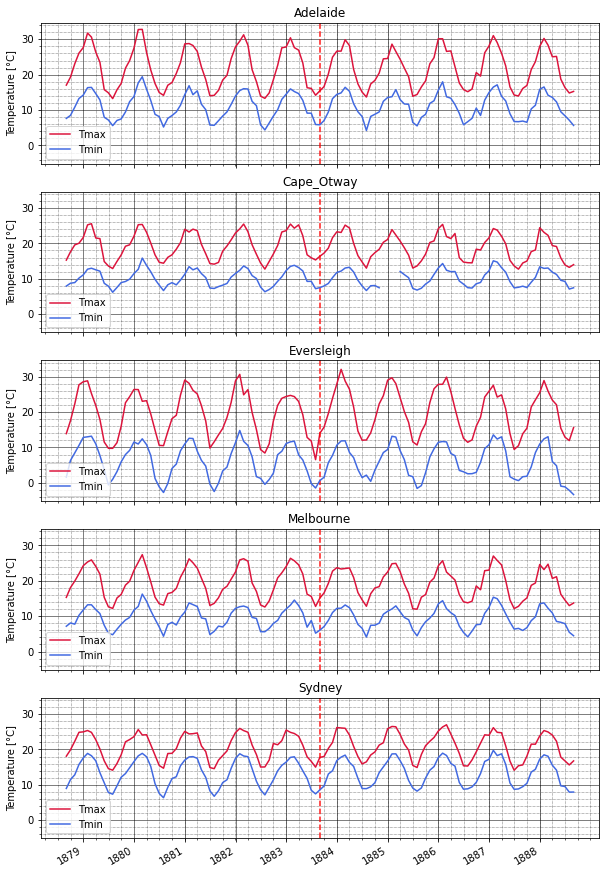

In [60]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_mon_mean_T.station):
        #plot number of frost days
        fplot.timeseries_noP(K_mon_mean_T.Tmax.sel(station=s), ax = axes[i], color='crimson', label = 'Tmax')
        # plot number of summer days
        K_mon_mean_T.Tmin.sel(station=s).plot(ax = axes[i], color='royalblue', label = 'Tmin')
        axes[i].set(ylabel= f'Temperature [{deg}C]', title = s.data) 
        axes[i].set_xlabel(None)
        # add legend        
        axes[i].legend(loc='lower left')
        
# # make one legend for all tables (just use last axis to get info)  
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.1)) # first arg to bbox is x second is y (x,y)

# set the axis ticks to be yearly 
axes[0].set_xticks(years)
axes[0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

plt.savefig('O_timeseries_monthly_Tmax+Tmin_stacked.png', dpi=300, bbox_inches='tight')

## extreme indices

In [31]:
d = K_ex_index.sel(time=(K_ex_index['time.month']==2))
d

<xarray.Dataset>
Dimensions:  (station: 5, time: 10)
Coordinates:
  * time     (time) datetime64[ns] 1879-02-28 1880-02-29 ... 1888-02-29
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables: (12/14)
    FD       (station, time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    SU       (station, time) int64 22 25 20 26 19 18 13 ... 15 11 17 17 23 14 11
    ID       (station, time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    TR       (station, time) int64 5 9 1 5 3 6 5 2 8 2 1 ... 7 5 7 2 4 6 9 5 6 5
    TXx      (station, time) float64 43.2 40.9 40.8 39.4 ... 33.4 36.3 30.6 31.0
    TNx      (station, time) float64 26.2 26.9 24.3 24.8 ... 21.2 23.9 21.6 25.7
    ...       ...
    TN10p    (station, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    TX10p    (station, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    TN90p    (station, time) float64 25.0 58.62 14.29 25.0 ... 42.86 32.14 20.69
    TX90p    (station, time) float64 32.14 55.17 25.0 50.0 ... 42.86 10.71 17.24
    DTR      (station, time) float64 14.2 13.38 13.9 15.22 ... 8.679 6.568 6.862
    ETR      (station, time) float64 31.9 29.6 30.4 29.7 ... 19.1 20.9 16.1 15.6

[]

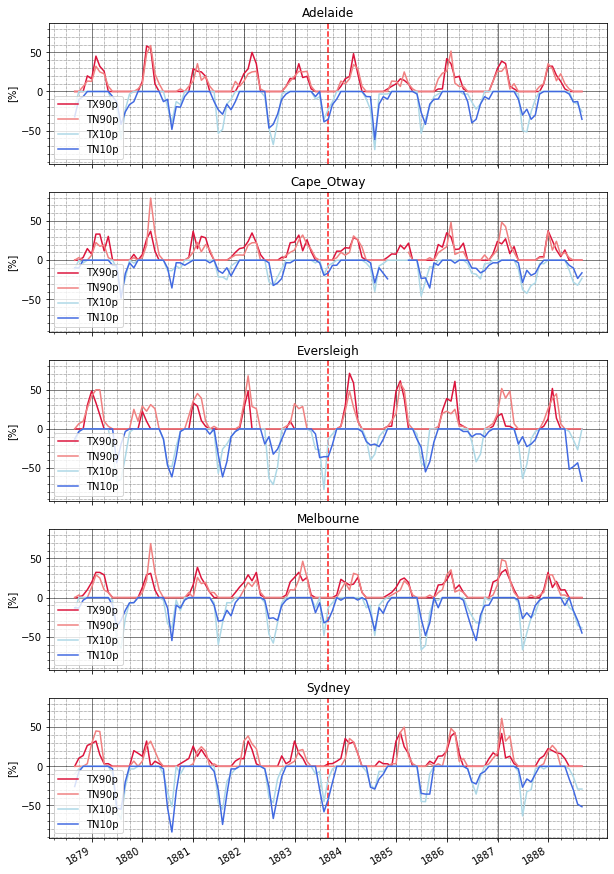

In [103]:
# Daily temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        #plot number of frost days
        fplot.timeseries_noP(K_ex_index.TX90p.sel(station=s), ax = axes[i], color='crimson', label = 'TX90p')
        # plot number of summer days
        K_ex_index.TN90p.sel(station=s).plot(ax = axes[i], color='lightcoral', label = 'TN90p')
        (-K_ex_index.TX10p.sel(station=s)).plot(ax = axes[i], color='lightblue', label = 'TX10p')
        (-K_ex_index.TN10p.sel(station=s)).plot(ax = axes[i], color='royalblue', label = 'TN10p')
        axes[i].set(ylabel= f'[%]', title = s.data) 
        axes[i].set_xlabel(None)
        # add legend        
        axes[i].legend(loc='lower left')
        
# # make one legend for all tables (just use last axis to get info)  
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.1)) # first arg to bbox is x second is y (x,y)

# set the axis ticks to be yearly 
axes[0].set_xticks(years)
axes[0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

# plt.savefig('O_timeseries_monthly_T90p+T10p_stacked.png', dpi=300, bbox_inches='tight')

## Trying to isolate each month so I can just plot each month

In [92]:
data = K_ex_index.TXx.sel(station='Adelaide')

data

<xarray.DataArray 'TXx' (time: 121)>
array([25.7, 26.6, 31.8, 40.6, 39.9, 45.5, 43.2, 37.5, 33. , 20.3, 18. , 16.4,
       21.8, 25.6, 30.2, 32. , 42.3, 45.6, 40.9, 35.1, 27.2, 21.5, 17.9, 16.9,
       21.2, 24.2, 27.5, 32.7, 41.5, 40.8, 40.8, 36.9, 28.8, 23.6, 18.4, 18.7,
       20.5, 29.4, 31.6, 39.6, 40.8, 44.2, 39.4, 37.4, 29.7, 24.5, 16.8, 20.3,
       21.2, 32.5, 34.5, 38.1, 38.5, 42.4, 41.8, 38.5, 34. , 24.1, 18.2, 18.7,
       19.1, 24.1, 30.3, 37. , 37.6, 43.2, 40.2, 38.5, 30.8, 25.1, 21.6, 17.8,
       26.8, 27.2, 33.1, 34.2, 36.2, 36.7, 39.7, 34.6, 29.1, 26.6, 16.6, 17.4,
       22.9, 24.4, 33.6, 34.6, 41.7, 44.5, 40.7, 37.2, 34.5, 22.5, 19.8, 20.2,
       22.1, 27.5, 25.8, 37.1, 38.9, 43.8, 38.4, 37.9, 35.2, 19.3, 19.3, 16.8,
       24.2, 25.7, 32.5, 37.5, 37.1, 41.4, 38.1, 36.4, 35.2, 29.9, 20.7, 17.3,
       20.6])
Coordinates:
  * time     (time) datetime64[ns] 1878-08-31 1878-09-30 ... 1888-08-31
    station  <U8 'Adelaide'

In [98]:
data['time.month'][0:12].data

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7])

In [99]:
data.plot(col=data['time.month'][0:12].data,col_wrap=3)

TypeError: unhashable type: 'numpy.ndarray'

In [100]:
ds = []
names = []
# select out eah month
for m in range(1,13):
    data = K_ex_index.TXx.sel(time=(K_ex_index['time.month']==m))
    ds.append(data)
    names.append(m)


In [ ]:
#jan
K_ex_index.TXx.sel(station='Adelaide').sel(time=(K_ex_index['time.month']==1))

### can use sns reds, greens, blues, yellows??

[]

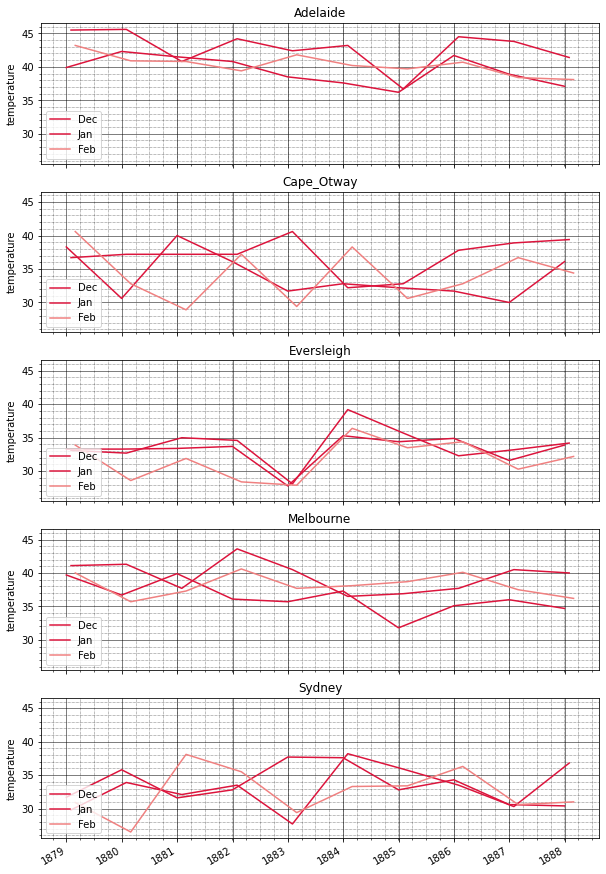

In [109]:
# Daily temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        #plot number of frost days
        fplot.timeseries_noP(K_ex_index.TXx.sel(time=(K_ex_index['time.month']==12)).sel(station=s), ax = axes[i], color='crimson', label = 'Dec')
        # plot number of summer days
        K_ex_index.TXx.sel(time=(K_ex_index['time.month']==1)).sel(station=s).plot(ax = axes[i], color='crimson', label = 'Jan')
        K_ex_index.TXx.sel(time=(K_ex_index['time.month']==2)).sel(station=s).plot(ax = axes[i], color='lightcoral', label = 'Feb')
        axes[i].set(ylabel= f'temperature', title = s.data) 
        axes[i].set_xlabel(None)
        # add legend        
        axes[i].legend(loc='lower left')
        
# # make one legend for all tables (just use last axis to get info)  
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.1)) # first arg to bbox is x second is y (x,y)

# set the axis ticks to be yearly 
axes[0].set_xticks(years)
axes[0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

# plt.savefig('O_timeseries_monthly_T90p+T10p_stacked.png', dpi=300, bbox_inches='tight')

[]

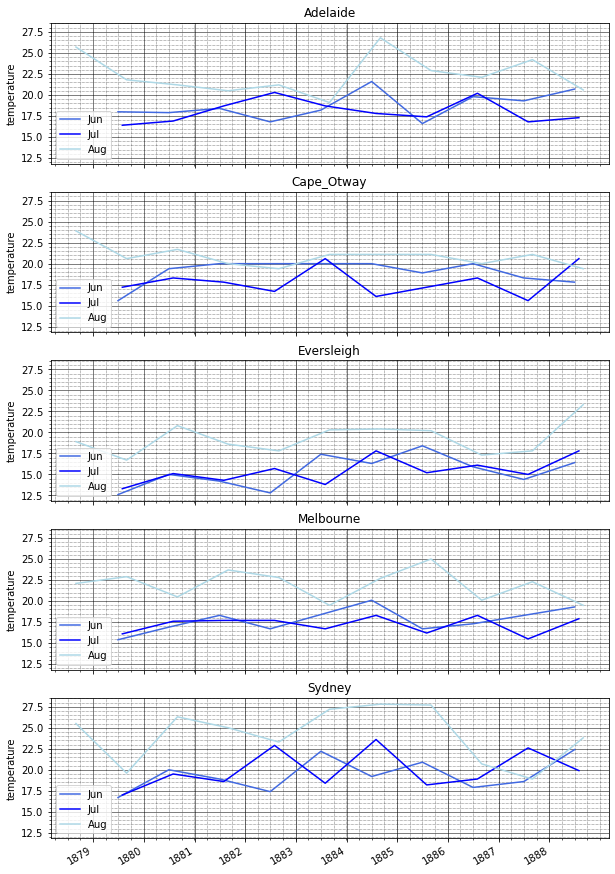

In [108]:
# Daily temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_ex_index.station):
        #plot number of frost days
        fplot.timeseries_noP(K_ex_index.TXx.sel(time=(K_ex_index['time.month']==6)).sel(station=s), ax = axes[i], color='royalblue', label = 'Jun')
        # plot number of summer days
        K_ex_index.TXx.sel(time=(K_ex_index['time.month']==7)).sel(station=s).plot(ax = axes[i], color='blue', label = 'Jul')
        K_ex_index.TXx.sel(time=(K_ex_index['time.month']==8)).sel(station=s).plot(ax = axes[i], color='lightblue', label = 'Aug')
        axes[i].set(ylabel= f'temperature', title = s.data) 
        axes[i].set_xlabel(None)
        # add legend        
        axes[i].legend(loc='lower left')
        
# # make one legend for all tables (just use last axis to get info)  
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.1)) # first arg to bbox is x second is y (x,y)

# set the axis ticks to be yearly 
axes[0].set_xticks(years)
axes[0].set_xticklabels(years.year) # .year displays only the year (not month time etc)

# plt.savefig('O_timeseries_monthly_T90p+T10p_stacked.png', dpi=300, bbox_inches='tight')

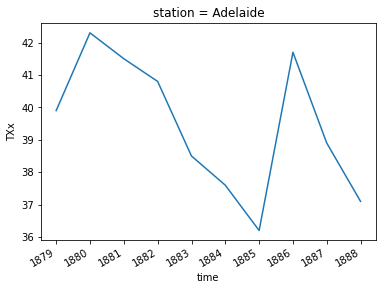

In [102]:
data.sel(station='Adelaide').plot()

In [61]:
ds

[<xarray.DataArray 'TXx' (station: 5, time: 10)>
 array([[45.5, 45.6, 40.8, 44.2, 42.4, 43.2, 36.7, 44.5, 43.8, 41.4],
        [36.7, 37.2, 37.2, 37.2, 40.6, 32.2, 32.8, 37.8, 38.9, 39.4],
        [33.1, 32.7, 35. , 34.6, 28.1, 39.2, 35.7, 32.3, 33.2, 34.2],
        [41.1, 41.3, 37.7, 43.6, 40.5, 36.5, 36.9, 37.7, 40.5, 40. ],
        [29.8, 33.9, 32.1, 33.5, 27.7, 38.2, 35.9, 33.5, 30.3, 36.8]])
 Coordinates:
   * time     (time) datetime64[ns] 1879-01-31 1880-01-31 ... 1888-01-31
   * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney',
 <xarray.DataArray 'TXx' (station: 5, time: 10)>
 array([[43.2, 40.9, 40.8, 39.4, 41.8, 40.2, 39.7, 40.7, 38.4, 38.1],
        [40.6, 32.8, 28.9, 37.2, 29.4, 38.3, 30.6, 32.8, 36.7, 34.4],
        [33.9, 28.6, 31.9, 28.4, 27.9, 36.4, 33.5, 34.4, 30.3, 32.2],
        [40. , 35.7, 37.3, 40.6, 37.7, 38.1, 38.7, 40.1, 37.5, 36.2],
        [30.9, 26.5, 38.1, 35.5, 29.4, 33.3, 33.4, 36.3, 30.6, 31. ]])
 Coordinates:
   * time     (tim

In [73]:
xr.concat(ds, dim='month', coords='minimal',compat='identical')

<xarray.DataArray 'TXx' (month: 12, station: 5, time: 121)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[ nan,  nan, 31.8, ...,  nan,  nan,  nan],
        [ nan,  nan, 26.7, ...,  nan,  nan,  nan],
        [ nan,  nan, 28.3, ...,  nan,  nan,  nan],
        [ nan,  nan, 32. , ...,  nan,  nan,  nan],
        [ nan,  nan, 30.3, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1878-08-31 1878-09-30 ... 1888-08-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Dimensions without coordinates: month